# HarvestStat Data Profiling - Burundi

In [1]:
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np
import pandas as pd
import geopandas as gpd
from tools import retreive_fdw_data, save_npz, PrintAdminUnits, PlotAdminShapes
from tools import FDW_PD_Sweeper, FDW_PD_AvalTable, FDW_PD_Compiling, FDW_PD_ValidateFnidName
from tools import FDW_PD_CreateAdminLink, FDW_PD_RatioAdminLink, FDW_PD_ConnectAdminLink
from tools import product_name_mapping, FDW_PD_CaliSeasonYear, FDW_PD_MergeCropProductionSystem
from tools_graphic import PlotBarProduction, PlotLinePAY
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)
pd.options.mode.chained_assignment = None

In [2]:
# Set loading parameters ------------------------ #
country_name = 'Burundi'
country_iso2 = 'BI'
use_api_data = False
requires_authentication = False
# ----------------------------------------------- #

# Load FEWS NET administrative boundaries ------- #
epsg = 'epsg:32736'
fn_shapes = sorted(glob.glob(f"../data/shapefile/fewsnet/{country_iso2}_Admin?_????.shp"))
shape_all = []
for fn in fn_shapes:
    name = fn[-18:-4]
    exec('%s = gpd.read_file("%s").to_crs("%s")' % (name, fn, epsg))
    exec('%s["area"] = %s["geometry"].area/10**6' % (name, name))
    exec('shape_all.append(%s)' % (name))
shape_all = pd.concat(shape_all, axis=0).reset_index(drop=True)
# PrintAdminUnits(shape_all)
# ----------------------------------------------- #

# Load FDW data -------------------------------- #
df = retreive_fdw_data(country_name, country_iso2, use_api_data, requires_authentication)
# ----------------------------------------------- #

Data is loaded from the local file.
../data/crop_raw_data/adm_crop_data_raw_BI.csv is loaded.


In [3]:
# Manual Pre-processing before Sweeping --------- #
# 1. Default setting
# a.1) None-type crop production system
df.loc[df['crop_production_system'].isna(), 'crop_production_system'] = 'none'
df.loc[df['crop_production_system'] == '', 'crop_production_system'] = 'none'
# a.2) Early in the record the catch-all crop production system is 'all' rather than none. Make these to none-type
df.loc[df['crop_production_system'] == 'all', 'crop_production_system'] = 'none'
# b) None-type population group
df.loc[df['population_group'].isna(), 'population_group'] = 'none'
df.loc[df['population_group'] == '', 'population_group'] = 'none'
# ----------------------------------------------- #
#Drop the hundreds of blank (nan) rows that are duplicates of rows that do have data
df = df[np.isfinite(df.value)]
df = df[df['admin_2'].isna()]

# FDW Production Data Inspection ---------------- #
df, df_raw = FDW_PD_Sweeper(df, area_priority='Area Planted')
table_dict = FDW_PD_AvalTable(df, shape_all)
# ----------------------------------------------- #

# # FEWS NET Shapefile comparison ----------------- #
shape_used = pd.concat([BI_Admin1_1982, BI_Admin1_1991, BI_Admin1_1998], axis=0)
PlotAdminShapes(shape_used, label=True)
# # ----------------------------------------------- #

- Remove missing records ---------------------- #
Orignial data points: 12,142
Removed 463 "Missing Value" points
7,541/7,578 "Quantity Produced" points are retained.
2,283/2,283 "Area Planted" points are retained.
1,855/2,281 "Yield" points are retained.
Current data points: 11,679



- Minor changes are applied ------------------- #

- Basic information --------------------------- #
Data period: 1996 - 2015
23 grain types are found: Banana (unspecified), Beans (mixed), Bush bean, Cassava, Cassava (non-bitter), Cooking Banana (unspecified), Cowpeas (Mixed), Groundnuts (In Shell), Maize (Corn), Millet (Finger), Pea (unspecified), Pigeon Peas, Pole bean, Potato (Irish), Rice (Paddy), Rice, not husked, Sorghum, Soybean (unspecified), Sunflower Seed, Sweet Potatoes, Taro, move to 1594AA, Wheat Grain, Yams
3 seasons are found: Season A (09-01), Season C (06-01), Season B (02-01)
1 crop production system are found: none
Data sources include:
[1] ISTEEBU, Burundi --- Annuaire Statistique, Burundi
[2] ISTEEBU, Burundi --- ENAB, Burundi
[3] Ministere de l'Agriculture et de l'Elevage/DSIA --- ENAB, Burundi
Administrative-1 fnids: 31
Administrative-2 fnids: 0
0 reporting units are found: 

- Total production over time ------------------ #
season_name                  Season A 

Season A: 20 years (1996-2015) (missing: 2 years)
Season C: 19 years (1996-2014) (missing: 2 years)
Season B: 19 years (1996-2014) (missing: 2 years)

- Number of "Quantity Produced" data points --- #
BI1991A1: 1,041 data points are found.
BI1998A1: 6,500 data points are found.

- Districts with population group(s) ---------- #
0 districts includes 'population_group'.

Table of available data


----------------------------------------------- #
Crop type: Banana (unspecified)
----------------------------------------------- #
season_name            Season A        Season B        Season C       
crop_production_system     none            none            none       
fnid_short               1991A1 1998A1   1991A1 1998A1   1991A1 1998A1
year                                                                  
1996                      15/16    NaN    15/16    NaN    15/16    NaN
1997                      15/16    NaN      NaN    NaN      NaN    NaN
1998                      15/16    NaN      NaN    NaN      NaN    NaN
1999                        NaN    NaN      NaN    NaN      NaN    NaN
2000                        NaN  16/17      NaN  16/17      NaN  16/17
2001                        NaN  16/17      NaN  16/17      NaN  16/17
2002                        NaN  16/17      NaN  16/17      NaN  16/17
2003                        NaN  16/17      NaN  16/17      NaN  16/17
2004            

../figures/BI_admin_shapes.png is saved.


- Burundi crop seasonal calendar

<img src="https://fews.net/sites/default/files/styles/large_width_880/public/2023-03/seasonal-calendar-burundi%20%281%29.png?itok=v2zPE4Fr"  width=900><br>

<img src="https://ipad.fas.usda.gov/rssiws/al/crop_calendar/images/eafrica_by_calendar.png"  width=900>

- comparison of boundaries

<img src="../figures/BI_admin_shapes.png"  width=900>

- In Burundi, basd on the FEWS NET data, there were four times of changes in administrative units: 1991,1998,2004,2017

| year	 | Admin1   | # units   | Admin2   | # units   |
| :---: | :----:  | :----:   | :----:   | :---:  |
| 1982	 | BI1982A1 | 15	| nan	| 0	|
| 1991	 | BI1991A1 | 16	| nan	| 0	|
| 1998	 | BI1998A1 | 17	| nan	| 0	|
| 2004	 | BI2004A1 | 17	| BI2004A2	| 129	|
| 2017	 | BI2017A1 | 18	| nan	| 0	|

- Here, we use **`BI1998A1`** to represent all admin-level 1 crop data because although there are 2004 and 2017 file, they don't appear to be used (e.g. no corresponding FNIDs)
- The data is available at admin level 1
- At admin-level 1,five crops have three seasons`Season A`,`Season B`,and `Season C`;Rice, not husked only has two seasons `Season A`and`Season B`

In [4]:
# Define the latest shapefile ------------------- #
latest_level = 1
shape_latest = BI_Admin1_1998.copy().to_crs('epsg:4326')
# ----------------------------------------------- #

# Validation of FNIDs and Names ----------------- #
df = FDW_PD_ValidateFnidName(df, shape_used, shape_latest)
# ----------------------------------------------- #

# FDW Production Data Compiling ----------------- #
area, prod = FDW_PD_Compiling(df, shape_used)
area_all, prod_all = area.copy(), prod.copy()
mdx_pss = area.columns.droplevel([0,1]).unique()
# ----------------------------------------------- #

In [5]:
# Link admin boundaries ------------------------- #
link_1982, over_1982 = FDW_PD_CreateAdminLink(BI_Admin1_1982,BI_Admin1_1998, 'ADMIN1', 'ADMIN1', prod, epsg)
link_1991, over_1991 = FDW_PD_CreateAdminLink(BI_Admin1_1991,BI_Admin1_1998, 'ADMIN1', 'ADMIN1', prod, epsg)

# Crop specific ratios
link_ratio_1982 = FDW_PD_RatioAdminLink(link_1982, prod, over_1982, mdx_pss)
link_ratio_1991 = FDW_PD_RatioAdminLink(link_1991, prod, over_1991, mdx_pss)

# Merge link_ratio
assert link_ratio_1982.keys() == link_ratio_1991.keys()
link_merged = [link_ratio_1991]
fnids_new = list(link_merged[0].keys())
link_ratio = dict()
for fnid in fnids_new:
    container = []
    for link in link_merged:
        container.append(link[fnid])
    link_ratio[fnid] = pd.concat(container, axis=1)
# Add current unit to link_ratio
for fnid_new in link_ratio.keys():
    link_ratio[fnid_new][fnid_new] = 1.0
    link_ratio[fnid_new] = link_ratio[fnid_new].sort_index(axis=1, ascending=False)

# Connect data with AdminLink
area_new, prod_new = FDW_PD_ConnectAdminLink(link_ratio, area, prod, validation=False)
# ----------------------------------------------- #

CBR is considered for 'BI1982A102' as no record found in: ['BI1998A102']


CBR is considered for 'BI1991A102' as no record found in: ['BI1998A102']


In [6]:
# Manual correction ----------------------------- #
crop_new = prod_new/area_new
# ----------------------------------------------- #

# Complete long format DataFrame ---------------- #
df_area = area_new.T.stack().rename('value').reset_index()
df_area['indicator'] = 'area'
df_prod = prod_new.T.stack().rename('value').reset_index()
df_prod['indicator'] = 'production'
df_yield = (prod_new/area_new).T.stack().rename('value').reset_index()
df_yield['indicator'] = 'yield'
stack = pd.concat([df_area, df_prod, df_yield], axis=0)
# Add "planting year"
cols = ['season_name','product','crop_production_system','planting_month','harvest_year','harvest_month','planting_year']
season_table = df[cols].drop_duplicates()
stack = stack.merge(season_table, on=cols[:-1])
# Add country and admin names
stack = stack.merge(df[['fnid','country','country_code','admin_1','admin_2']].drop_duplicates(), on='fnid', how='inner')
names = [
    'fnid','country','country_code','admin_1','admin_2','name',
    'product','season_name','planting_year','planting_month','harvest_year','harvest_month',
    'crop_production_system','indicator','value'
]
stack = stack[names]
# ----------------------------------------------- #

# Final Processing ------------------------------ #
# Product name mapping
stack = product_name_mapping(stack, list_except=None)
# Calibration of crop calendar using External Season Calendar (ESC)
esc = pd.read_csv('../data/crop_calendar/external_season_calendar.csv')
stack, link_ratio = FDW_PD_CaliSeasonYear(stack, esc, link_ratio=None)
# None admin names
stack.loc[stack['admin_1'].isna(), 'admin_1'] = 'none'
stack.loc[stack['admin_2'].isna(), 'admin_2'] = 'none'
# ----------------------------------------------- #



All [country, season_name] are in the external season calendar.


In [7]:
# Save data
fn_out = '../data/crop/adm_crop_production_BI.csv'
stack.to_csv(fn_out); print(f'{fn_out} is saved.')
save_npz('../data/crop/adm_crop_production_BI_ratio.npz', link_ratio)

../data/crop/adm_crop_production_BI.csv is saved.
../data/crop/adm_crop_production_BI_ratio.npz is saved.


# Visualization of production data

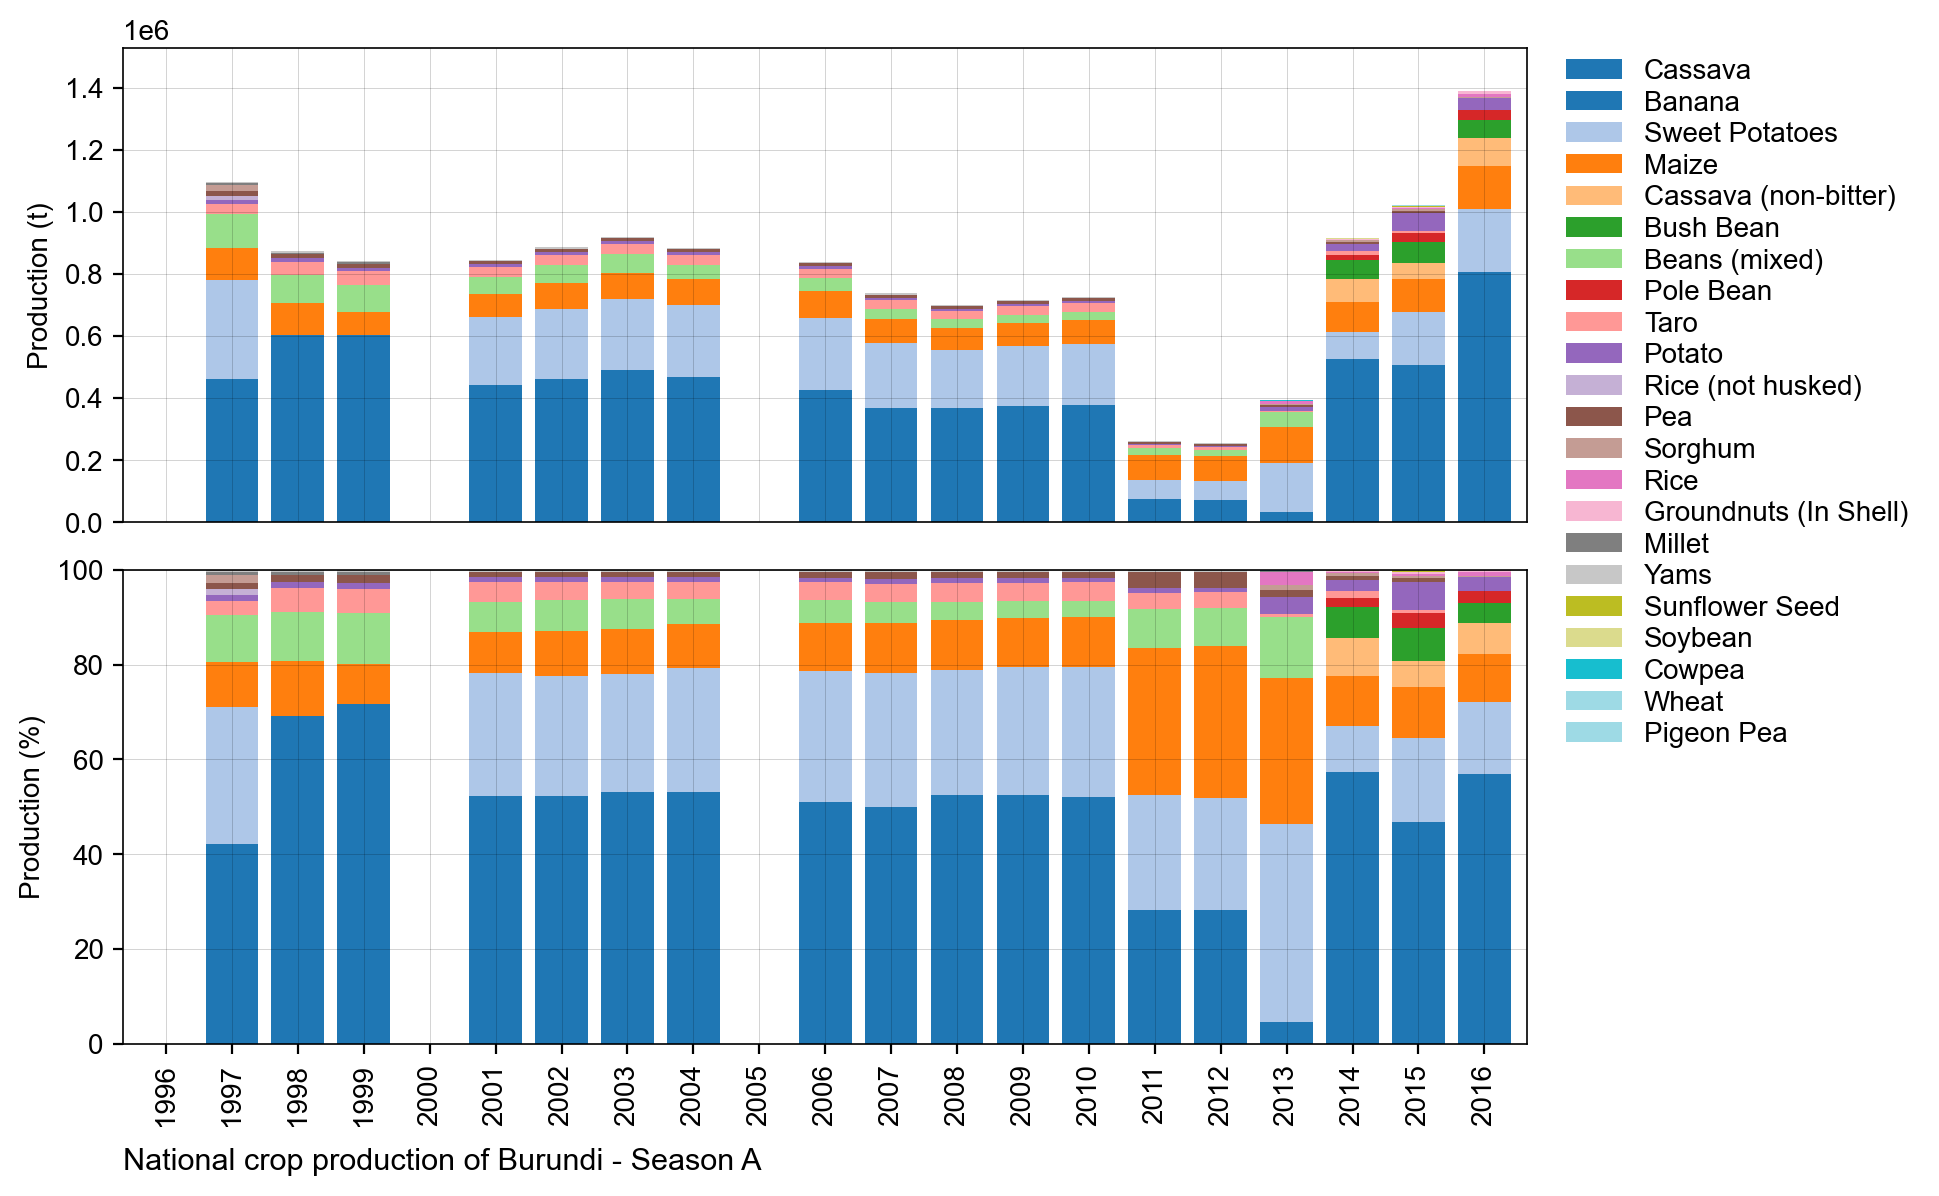

../figures/BI_bar_natgrainprod_Season A.png is saved.


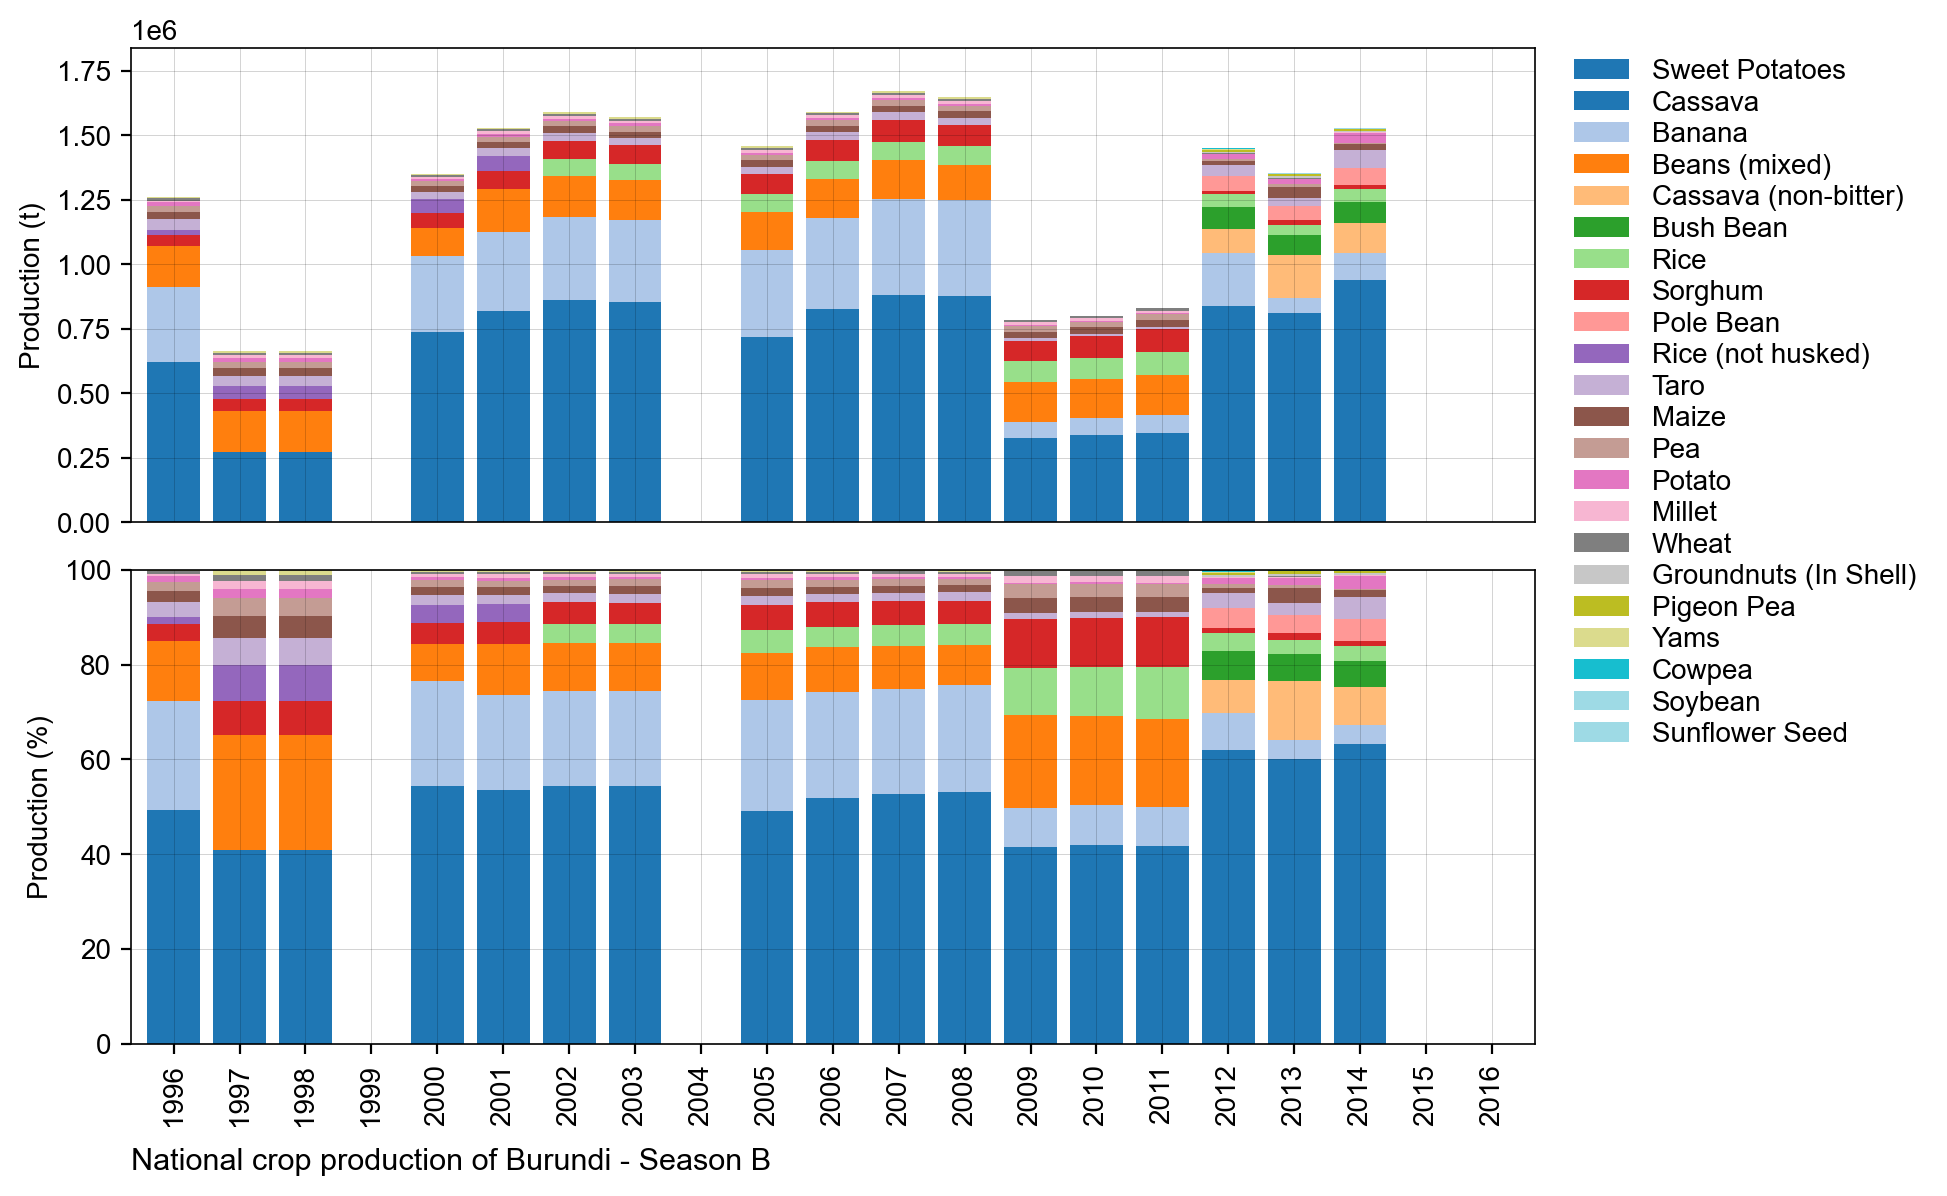

../figures/BI_bar_natgrainprod_Season B.png is saved.


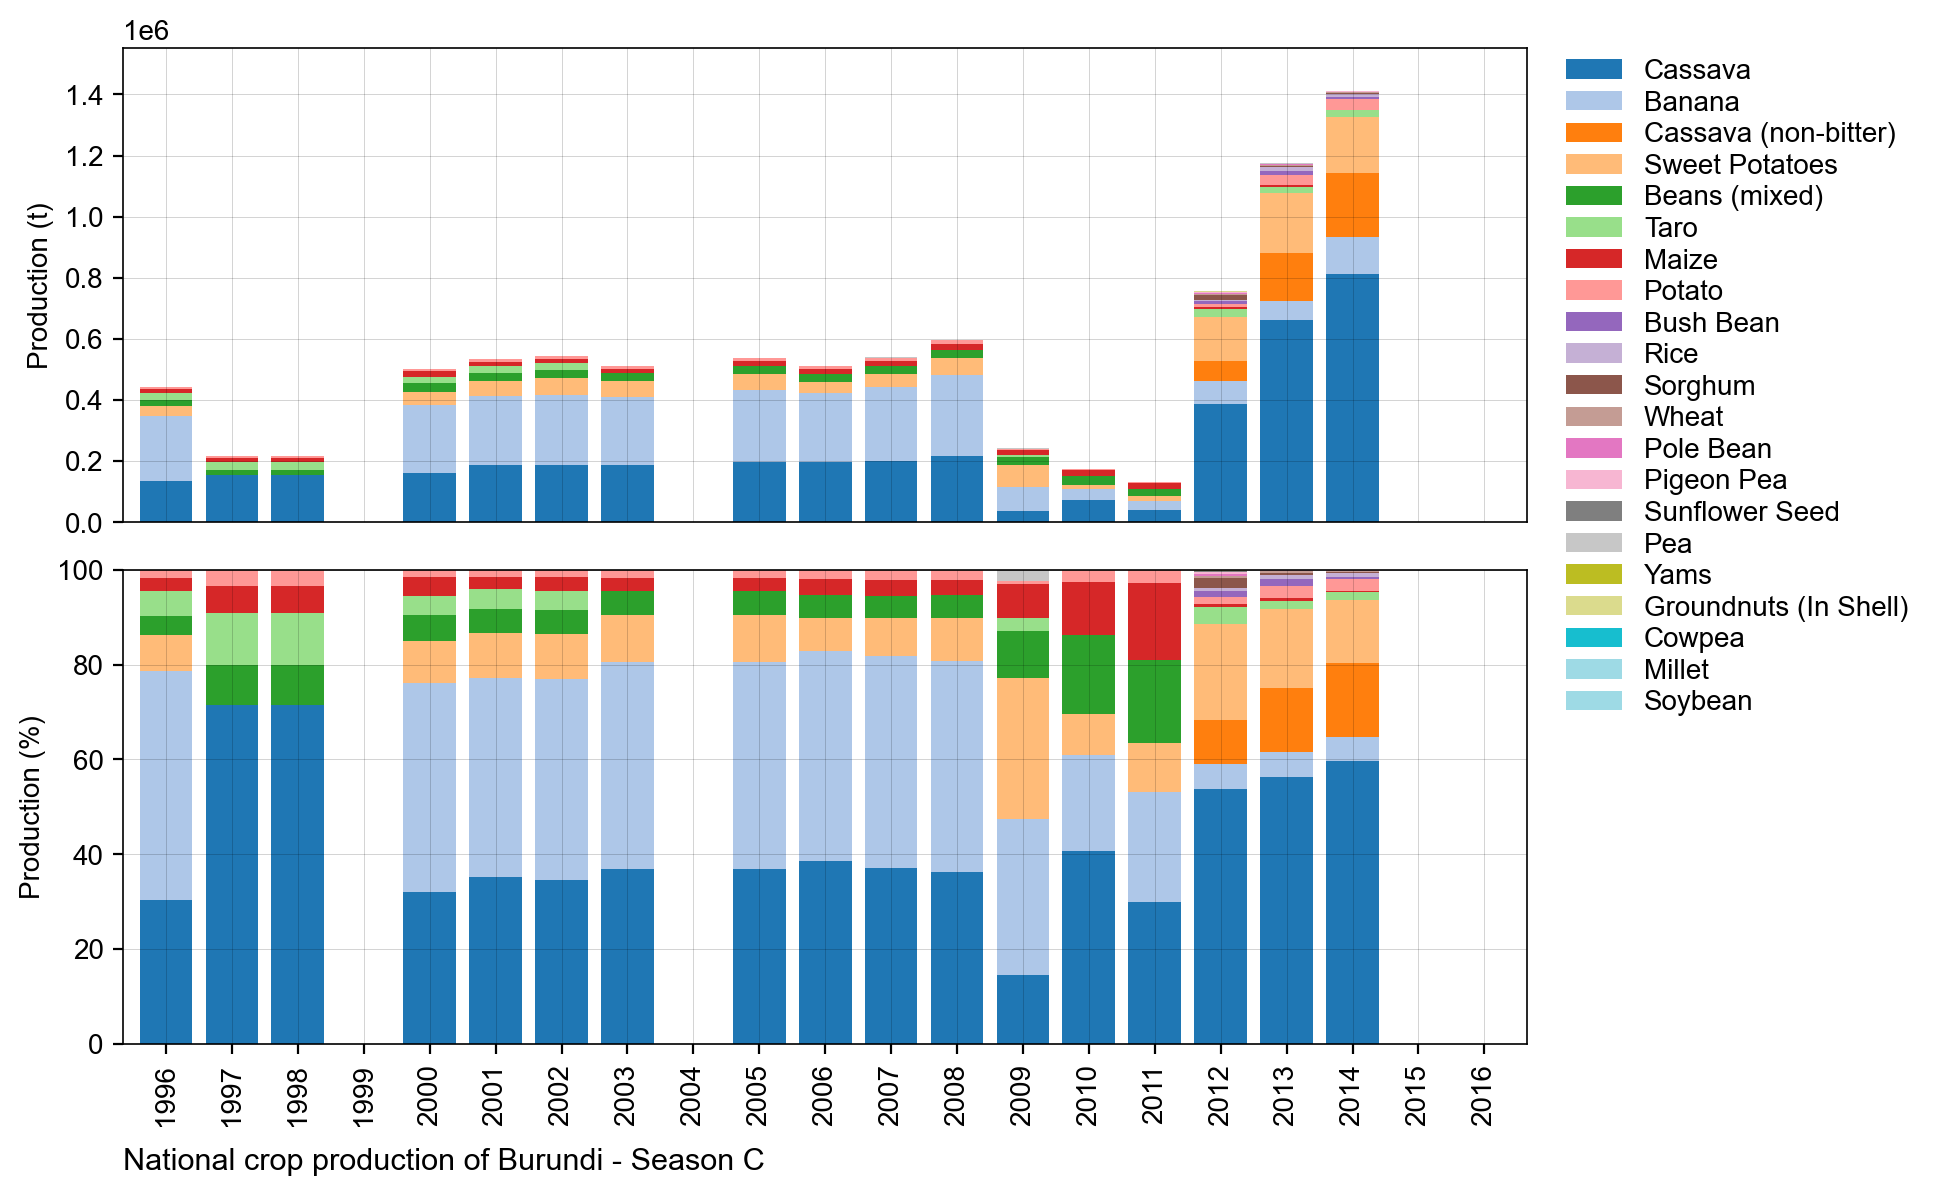

../figures/BI_bar_natgrainprod_Season C.png is saved.


In [8]:
# Bar chart of national crop production
country_iso, country_name = 'BI', 'Burundi'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
for season_name in ['Season A','Season B','Season C']:
    footnote = 'National crop production of %s - %s' % (country_name, season_name)
    fn_save = '../figures/%s_bar_natgrainprod_%s.png' % (country_iso, season_name)
    sub = df[df['season_name'] == season_name]
    PlotBarProduction(sub, year, footnote, fn_save)

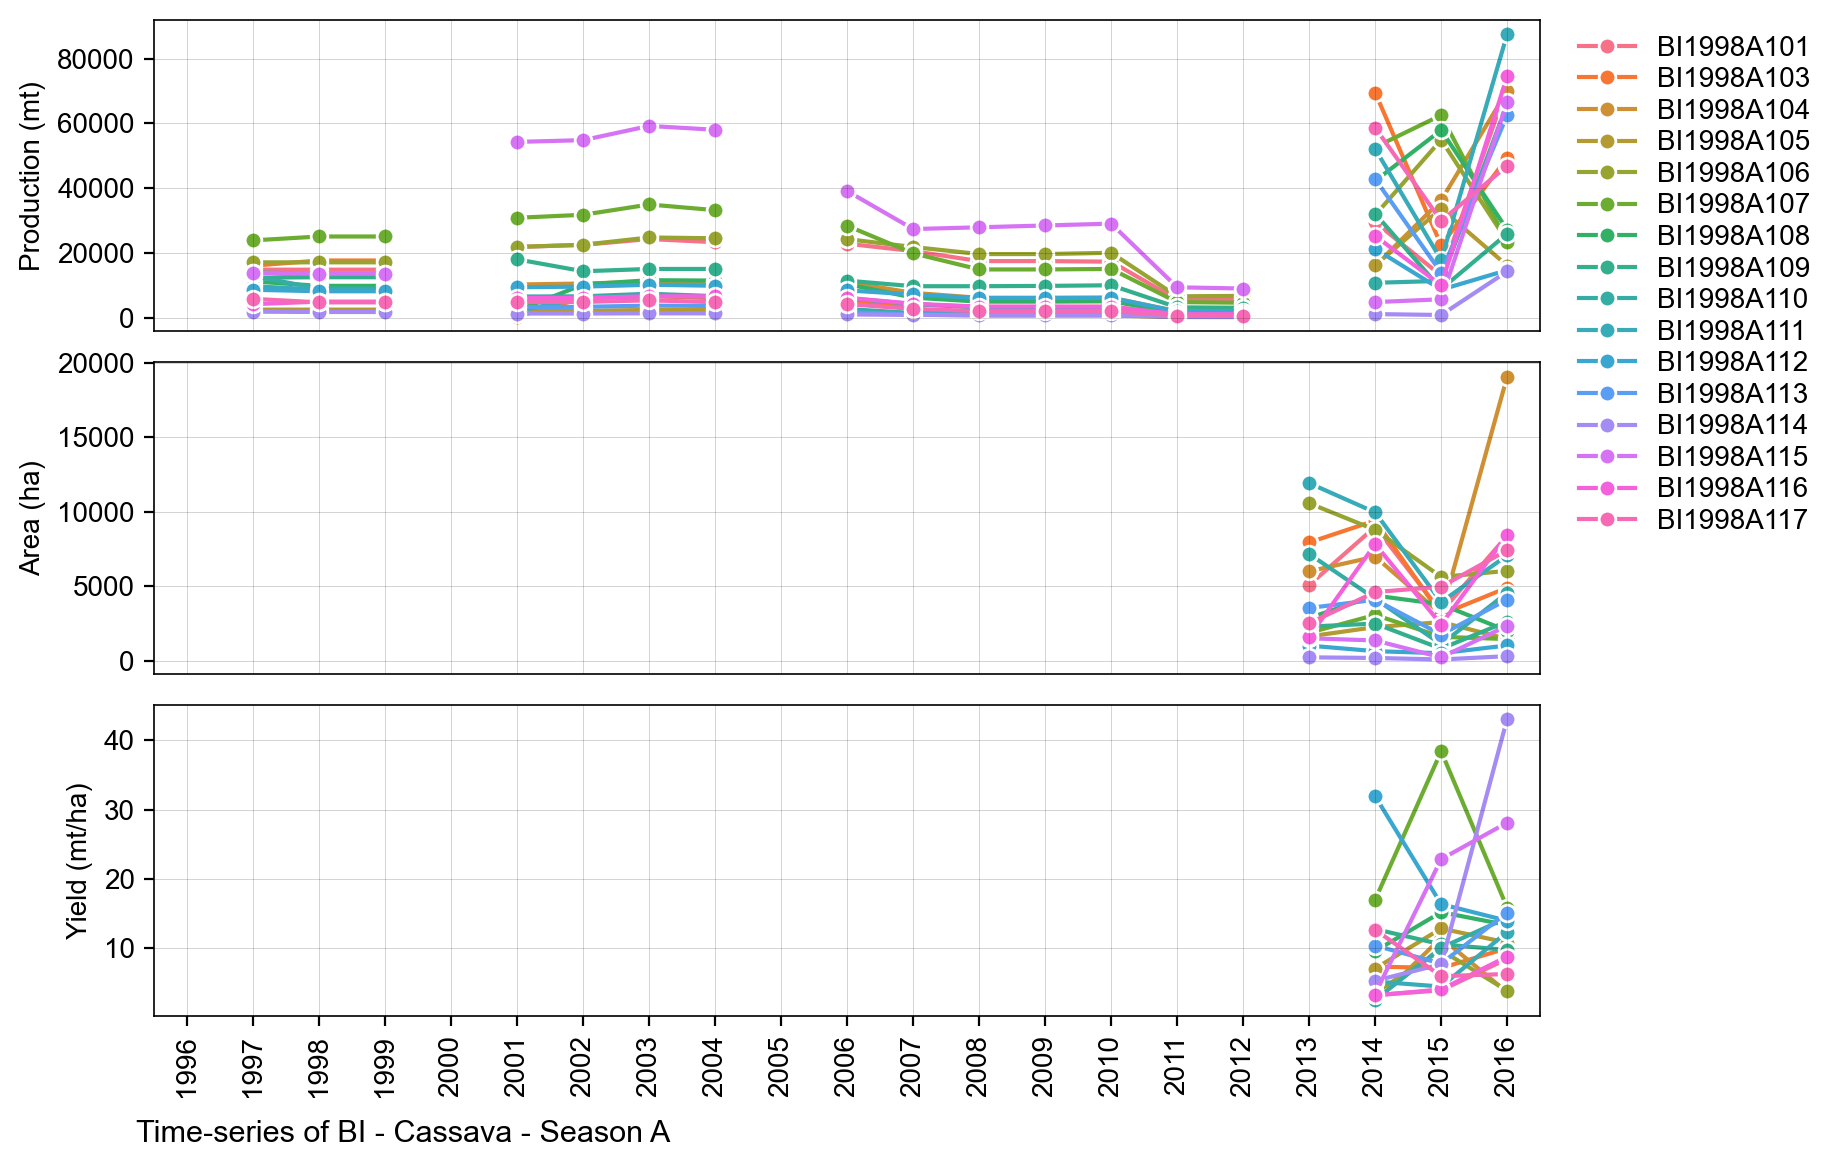

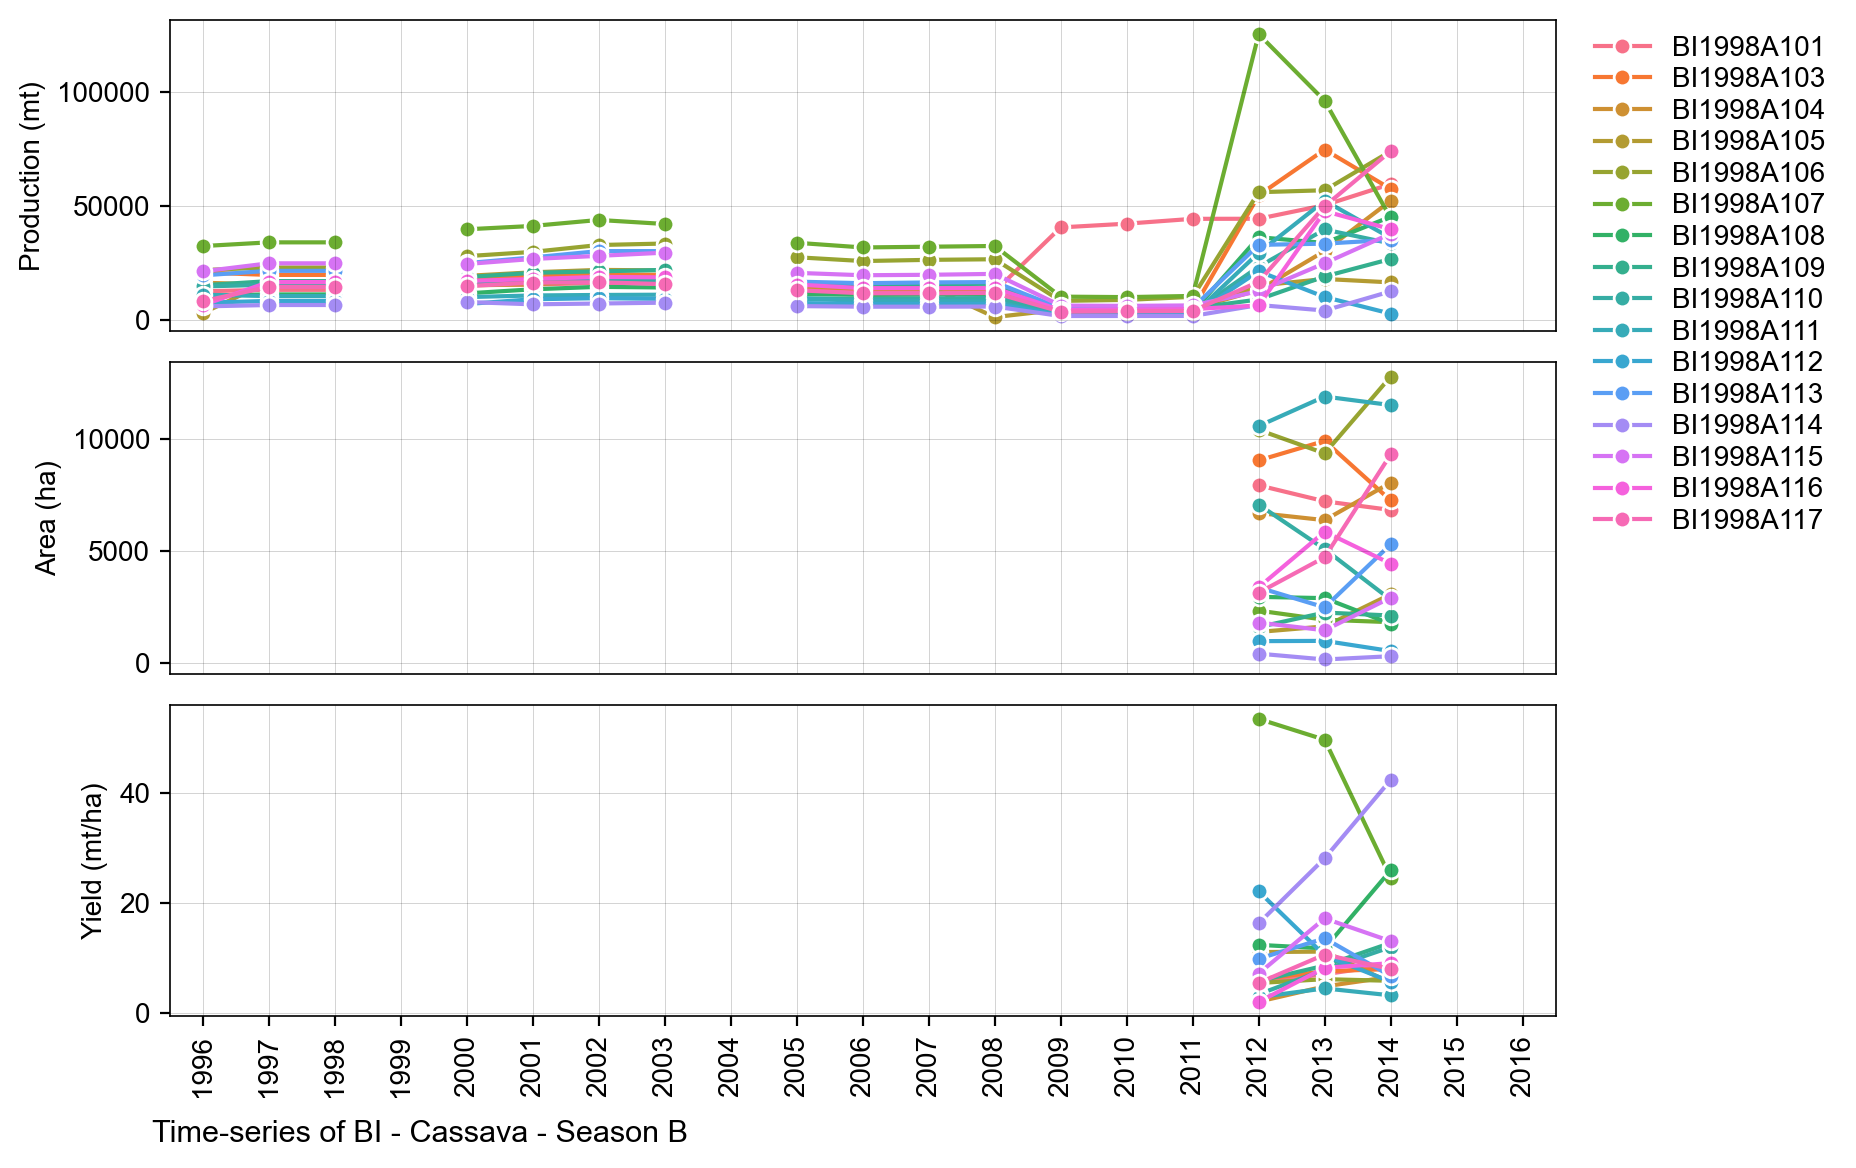

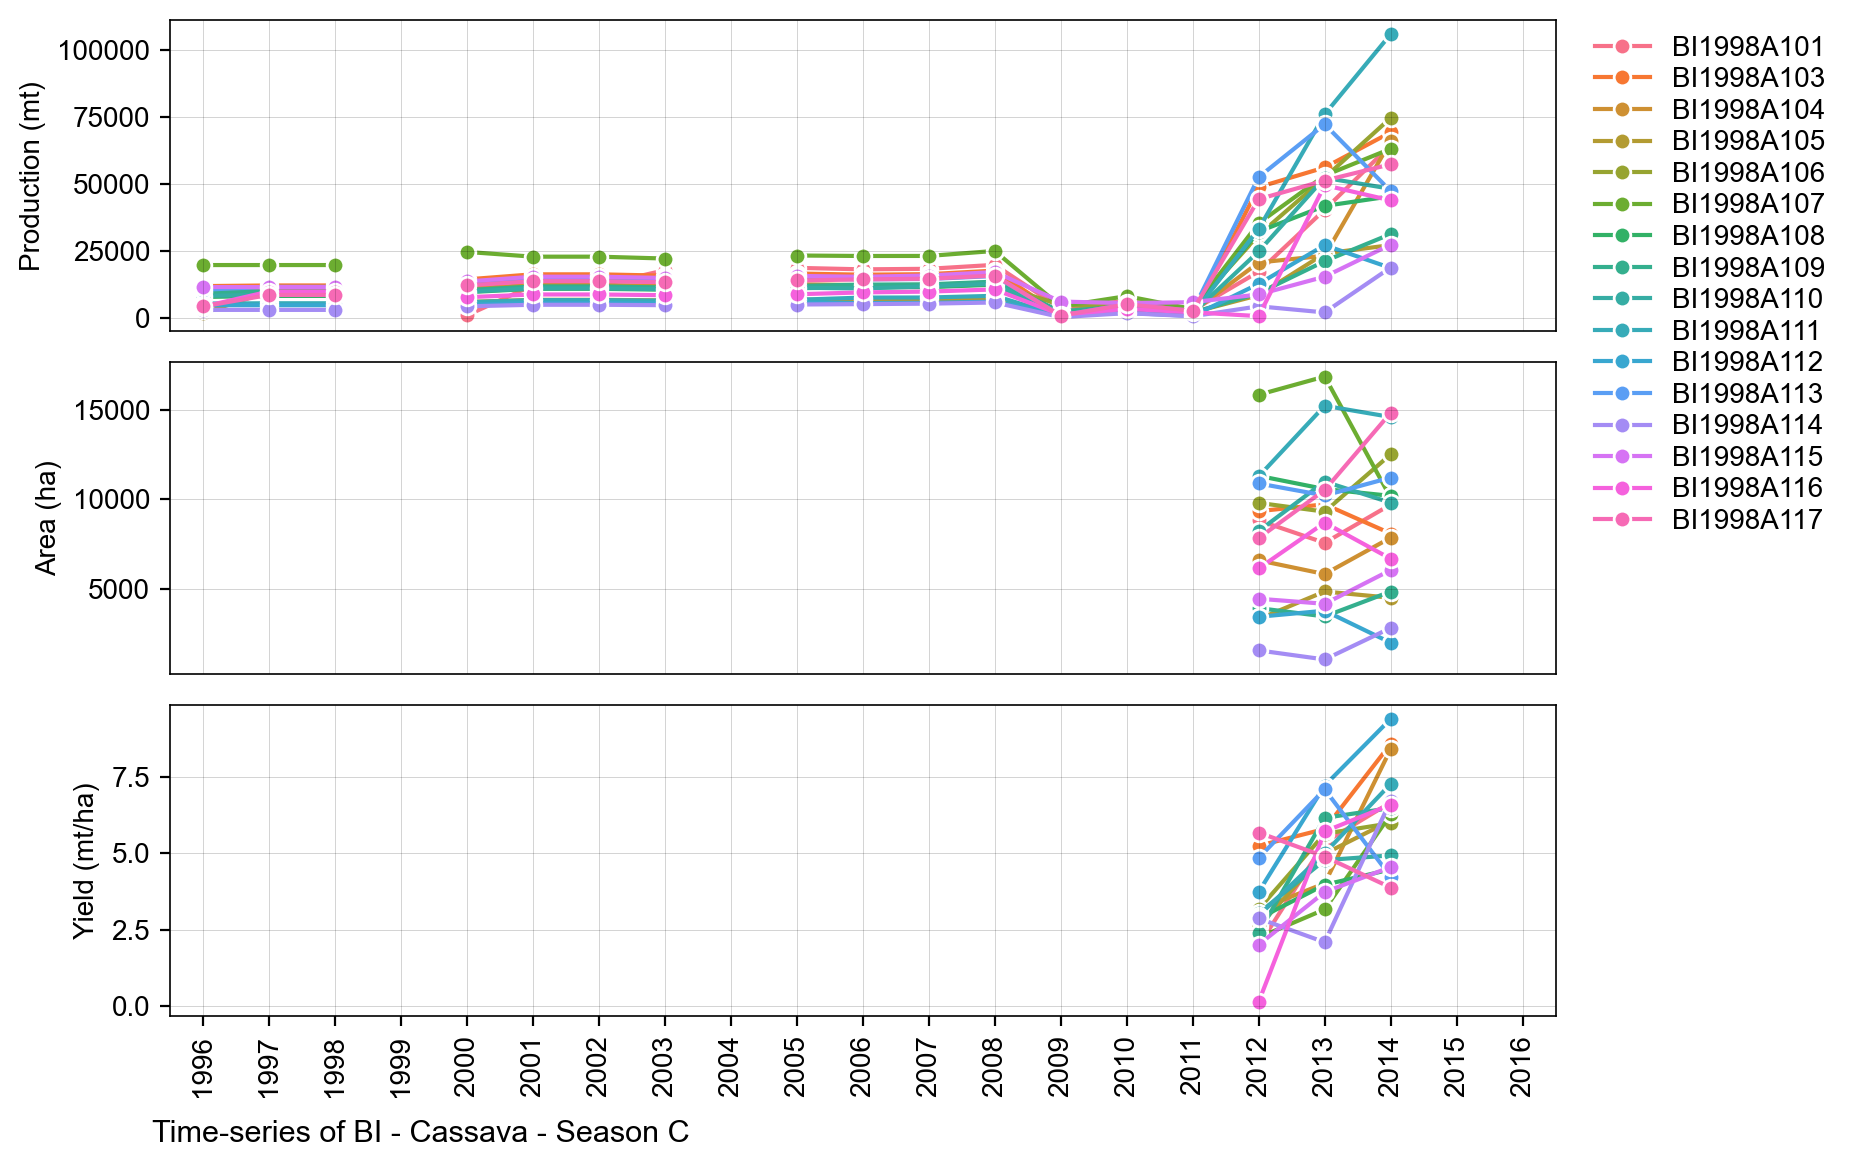

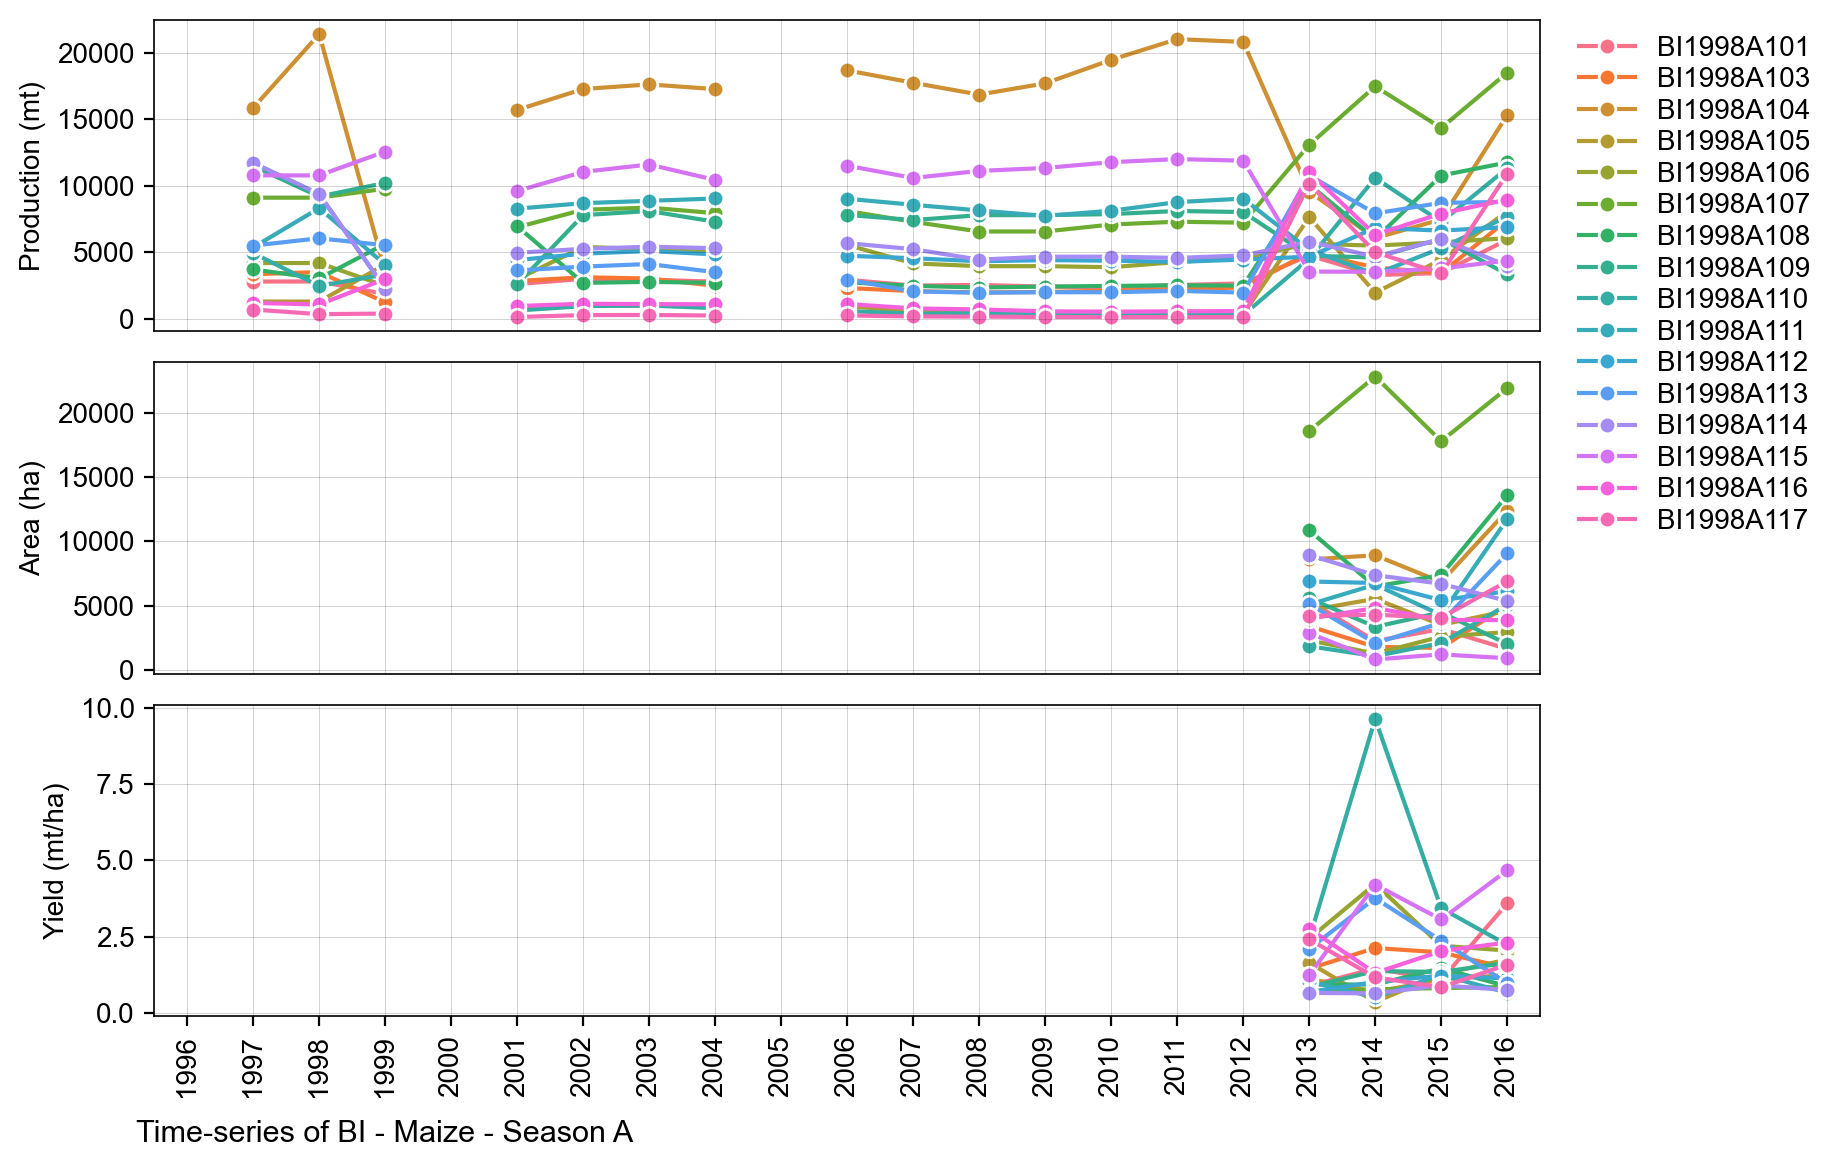

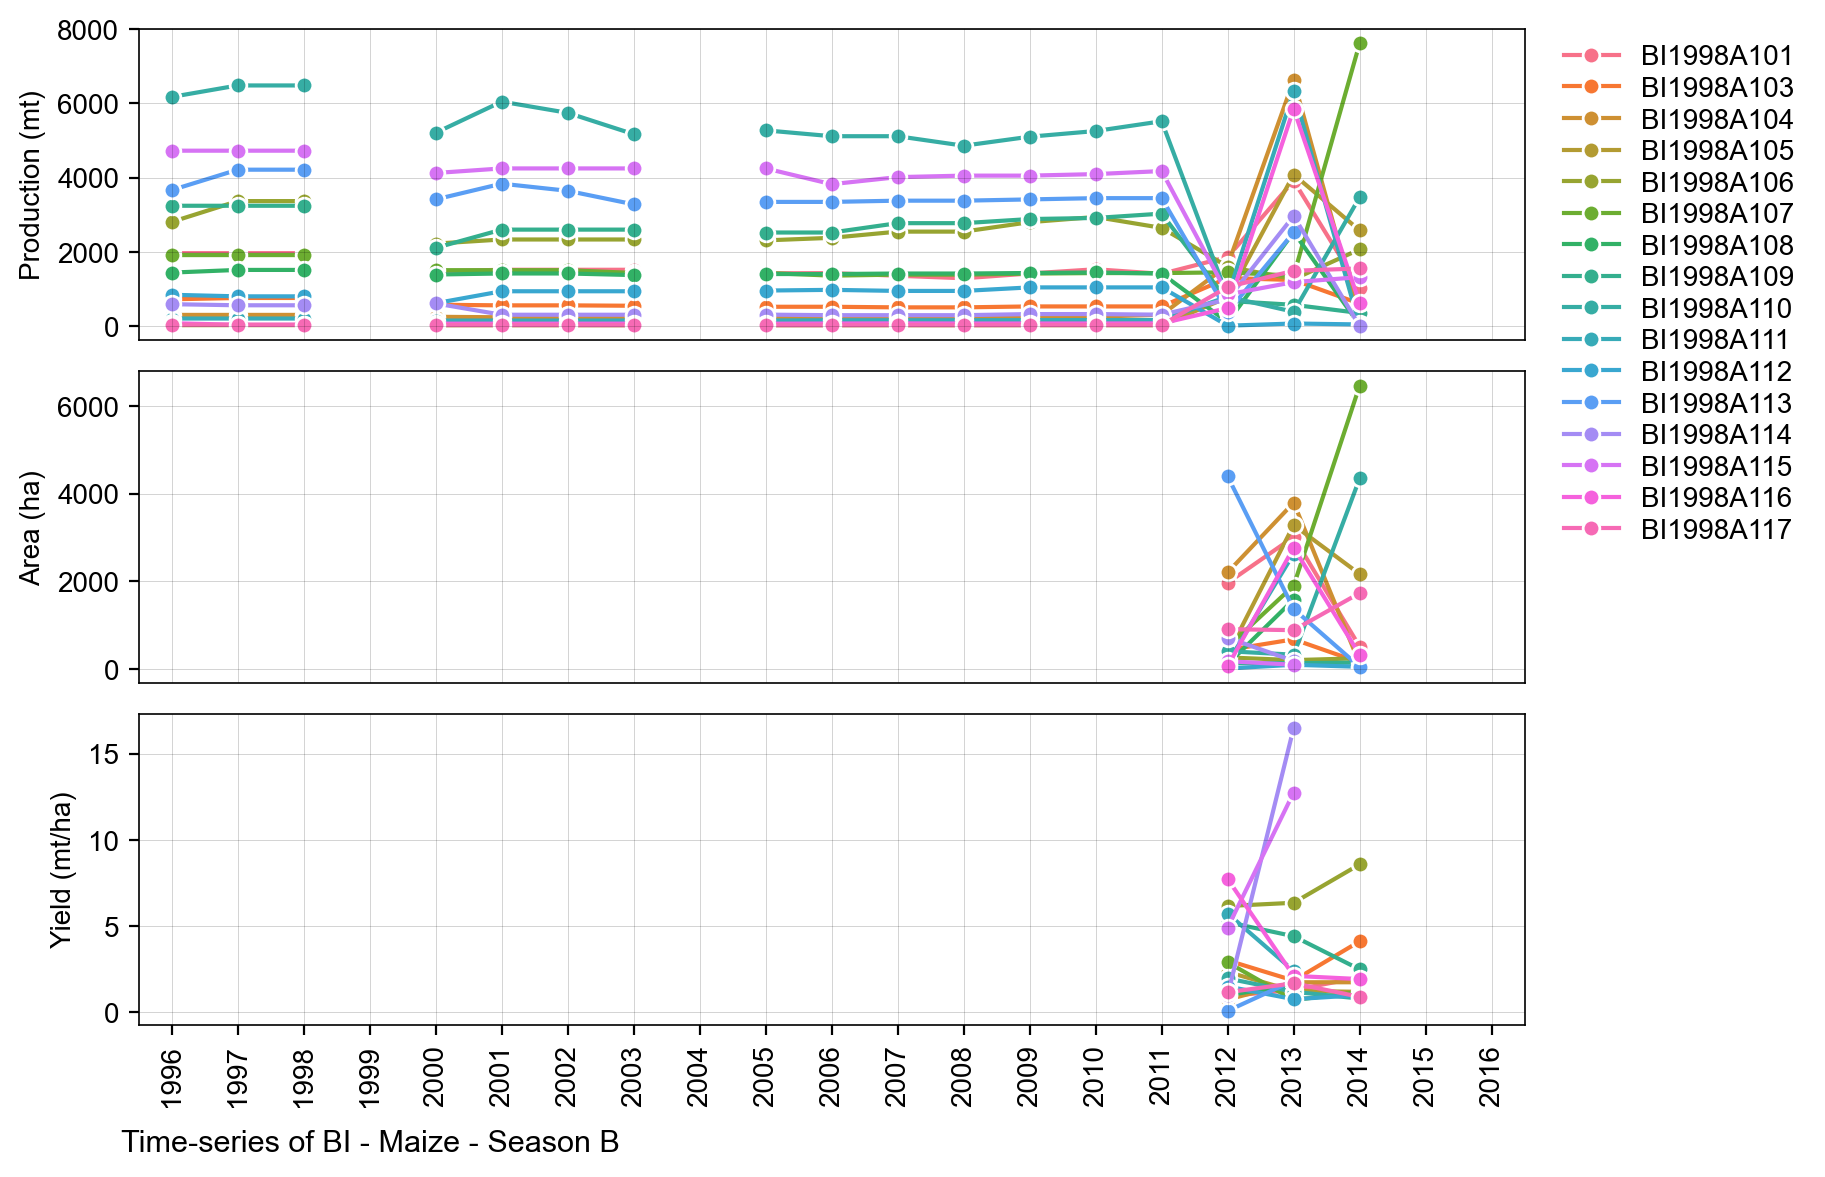

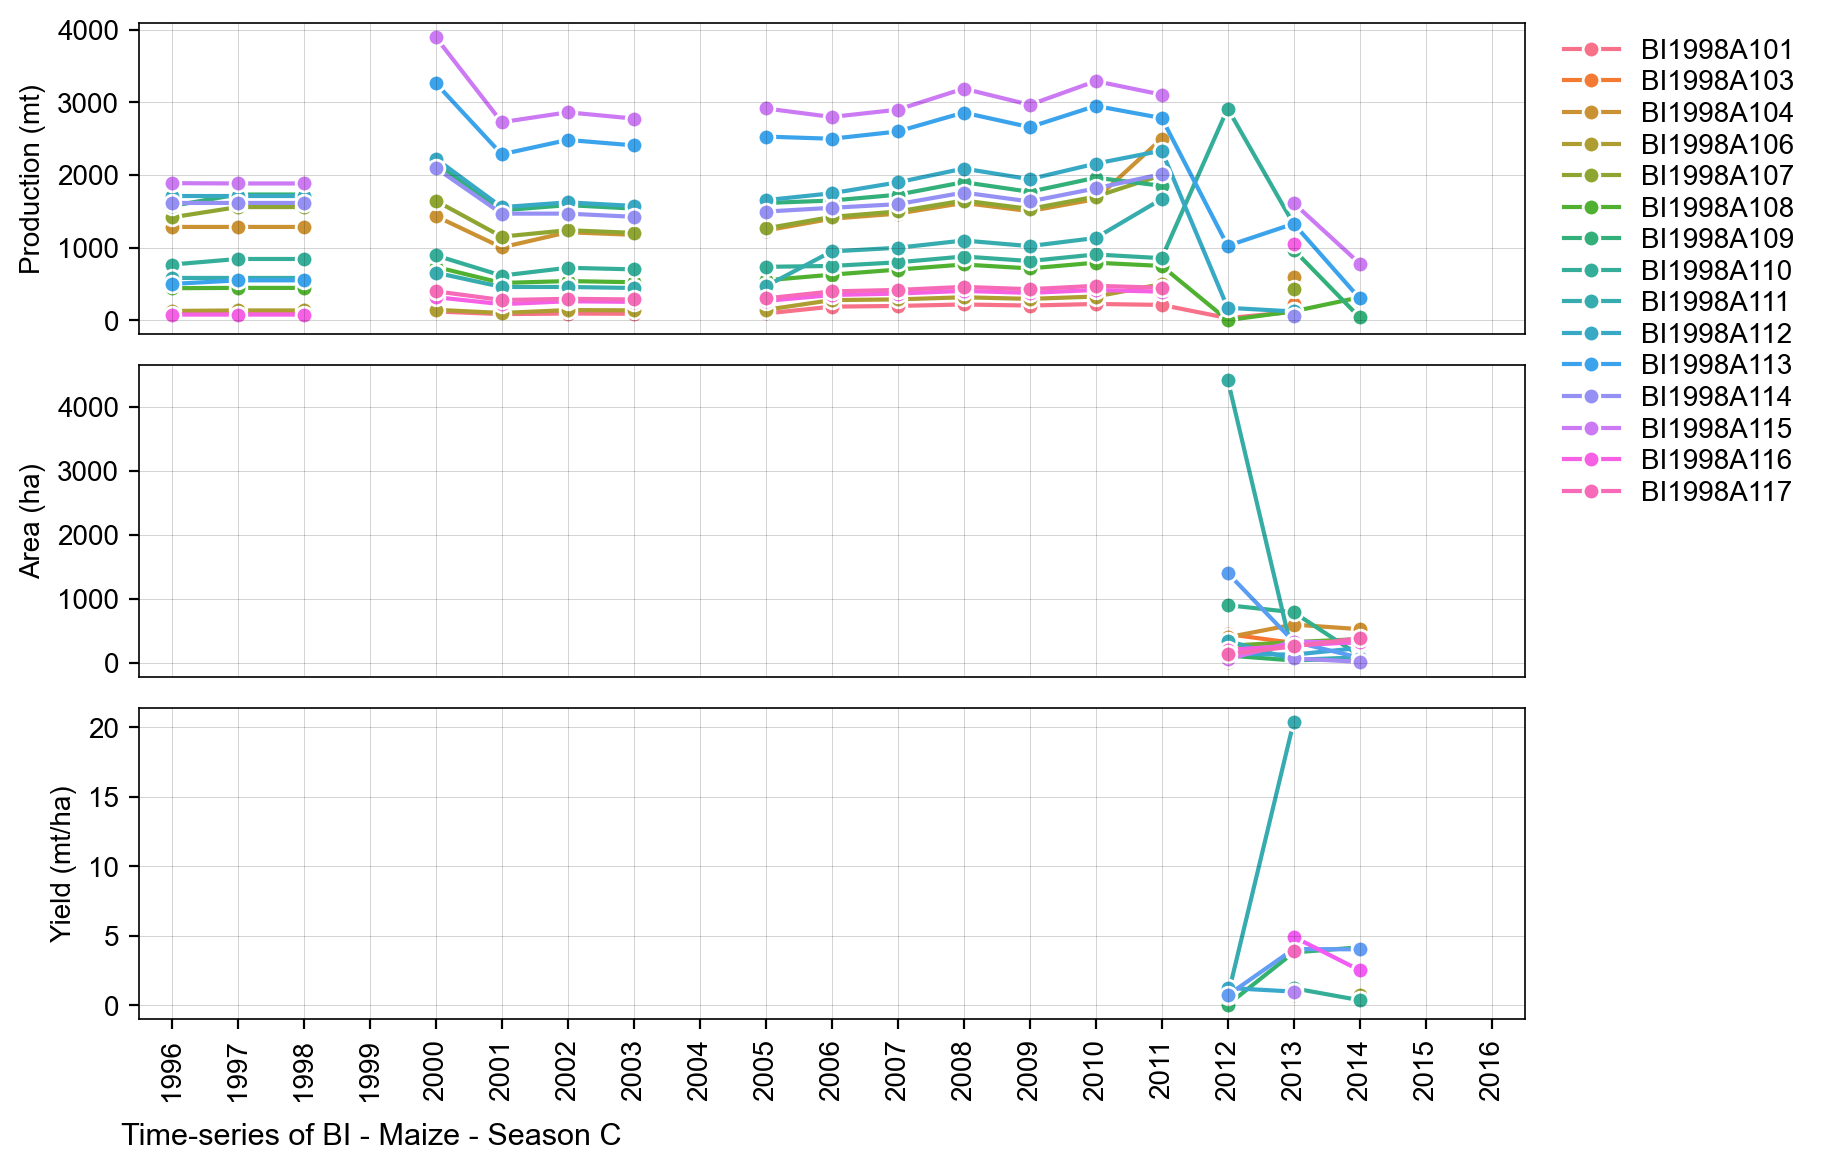

In [9]:
# Lineplot of Production-Area-Yield time-series
country_iso, country_name = 'BI', 'Burundi'
df = pd.read_csv('../data/crop/adm_crop_production_%s.csv' % country_iso, index_col=0)
df['year'] = df['harvest_year']
year = [df['year'].min(), df['year'].max()]
product_season = [
    ['Cassava', 'Season A'],
    ['Cassava', 'Season B'],
    ['Cassava', 'Season C'],
    ['Maize', 'Season A'],
    ['Maize', 'Season B'],
    ['Maize', 'Season C'],
]
for product_name, season_name in product_season:
    footnote = 'Time-series of %s - %s - %s' % (country_iso, product_name, season_name)
    fn_save = '../figures/%s_line_pay_%s_%s.png' % (country_iso, product_name, season_name)
    sub = df[(df['product'] == product_name) & (df['season_name'] == season_name)]
    if len(sub['year'].unique()) < 1: continue
    PlotLinePAY(sub, year, footnote)